In [1]:
from pydub import AudioSegment
from pydub.playback import play
from pydub import silence
import thesis_functions as tf
from scipy.io import wavfile
import noisereduce as nr    

In [2]:
def return_audios(path, red_path):
    # load data
    rate, data = wavfile.read(path)
    # perform noise reduction
    reduced_noise = nr.reduce_noise(y=data, sr=rate)
    wavfile.write(red_path, rate, reduced_noise)

    with_noise = AudioSegment.from_file(file=path, format="wav")
    red_noise = AudioSegment.from_file(file=red_path, format="wav")
    return with_noise, red_noise

In [3]:
db_path = '/media/emile/disk/Controls/Controls/'
skip_dirs = ['BotAudios']

people = tf.get_dirs_below(db_path)
people

['USER_01_CB2_Conversations',
 'User_01_CB_Conversations',
 'USER_02_CB2_Conversations',
 'User_02_CB_Conversations',
 'USER_03_CB2_Conversations',
 'User_03_CB_Conversations',
 'User_04_CB2_Conversations',
 'User_05_CB2_Conversations',
 'User_05_CB_Conversations',
 'USER_06_CB2_Conversations',
 'USER_07_CB2_Conversations',
 'User_07_CB_Conversations',
 'User_10_CB_Conversations',
 'USER_12_CB2_Conversations',
 'User_13_CB_Conversations',
 'User_14_CB_Conversations',
 'USER_15_CB2_Conversations',
 'User_15_CB_Conversations',
 'USER_17_CB2_Conversations',
 'User_17_CB_Conversations',
 'User_18_CB_Conversations',
 'User_20_CB_Conversations',
 'User_21_CB_Conversations',
 'User_22_CB_Conversations',
 'User_23_CB_Conversations',
 'USER_24_CB2_Conversations',
 'User_24_CB_Conversations',
 'User_25_CB_Conversations',
 'User_27_CB_Conversations',
 'User_28_CB_Conversations',
 'User_29_CB_Conversations',
 'User_33_CB_Conversations',
 'User_34_CB_Conversations',
 'User_35_CB_Conversations',
 'U

In [4]:
import os

def add_audio_to_dict(dict, folder_path, skip_dirs, format='wav', category_dir_index=2, skip_dir_index=2):
    """Scans through folder and puts all sounds files in a dictionary.
    The key is based on the name of the category dirs.
    Folders can be skipped if the folder names are in the skip_dirs list.
    The index of amount of splits on / can be changed for both.
    """
    # for x in dict:
    #     dict[x] = []
    for root, dirs, files in os.walk(folder_path):
        if (root.split('/')[-skip_dir_index] not in skip_dirs):
            for item in files:
                if item.endswith(f'.{format}'):
                    category = root.split('/')[6]
                    id = item[:-4]
                    num = item.split('=')[1]
                    num = num.split('.')[0]
                    num = int(num)
                    
                    conv = root.split('/')[-2]

                    filepath = root + '/' + item
                    # print(category)
                    # print(id)

                    if category not in dict:
                        dict[category] = {}
                    if conv not in dict[category].keys():
                        dict[category][conv] = []
                    dict[category][conv].append((filepath, num))

    samples = {}   
    for cat in dict:
        samples[cat] = {}
        for conv in dict[cat]:
            dict[cat][conv].sort(key=lambda x: x[1])
            samples[cat][conv] = []
            for sample in dict[cat][conv]:
                samples[cat][conv].append(AudioSegment.from_file(sample[0], format='wav'))
    return samples

In [5]:
data = {}
for p in people:
    data[p] = {}
samples = add_audio_to_dict(data, folder_path=db_path, skip_dirs=skip_dirs, format='wav', category_dir_index=3, skip_dir_index=2)

In [6]:
samples

{'USER_01_CB2_Conversations': {'USER_01_CB2_20230131_100202': [<pydub.audio_segment.AudioSegment at 0x7f8214584070>,
  'USER_01_CB2_20230131_101302': [<pydub.audio_segment.AudioSegment at 0x7f81f1cb6df0>,
  'USER_01_CB2_20230131_102058': [<pydub.audio_segment.AudioSegment at 0x7f81f1cb6fd0>,
  'USER_01_CB2_20230131_102905': [<pydub.audio_segment.AudioSegment at 0x7f81f1ca7ac0>,
  'USER_01_CB2_20230131_103622': [<pydub.audio_segment.AudioSegment at 0x7f82144b4130>,
  'USER_01_CB2_20230131_104222': [<pydub.audio_segment.AudioSegment at 0x7f82144b4310>,
   <pydub.audio_segment.AudioSegment at 0x7f81f1c48490>]},
 'User_01_CB_Conversations': {'User_01_CB_20221116_094233': [<pydub.audio_segment.AudioSegment at 0x7f81f1c48340>,
  'User_01_CB_20221116_094932': [<pydub.audio_segment.AudioSegment at 0x7f81f1c48280>,
  'User_01_CB_20221116_095440': [<pydub.audio_segment.AudioSegment at 0x7f81f1c487c0>],
  'User_01_CB_20221116_095834': [<pydub.audio_segment.AudioSegment at 0x7f81f1c48910>,
  'User

In [7]:
from joblib import load

# samples = load("/media/emile/disk/chatbot_samples.pkl")
# samples = data

In [8]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

def show_audio_plot(file, title):
    y, sr = librosa.load(file)
    fig, ax = plt.subplots(nrows=1, sharex=True)
    librosa.display.waveshow(y, sr=sr, ax=ax)
    ax.set(title=title)
    ax.label_outer()

In [9]:
samples

{'USER_01_CB2_Conversations': {'USER_01_CB2_20230131_100202': [<pydub.audio_segment.AudioSegment at 0x7f8214584070>,
  'USER_01_CB2_20230131_101302': [<pydub.audio_segment.AudioSegment at 0x7f81f1cb6df0>,
  'USER_01_CB2_20230131_102058': [<pydub.audio_segment.AudioSegment at 0x7f81f1cb6fd0>,
  'USER_01_CB2_20230131_102905': [<pydub.audio_segment.AudioSegment at 0x7f81f1ca7ac0>,
  'USER_01_CB2_20230131_103622': [<pydub.audio_segment.AudioSegment at 0x7f82144b4130>,
  'USER_01_CB2_20230131_104222': [<pydub.audio_segment.AudioSegment at 0x7f82144b4310>,
   <pydub.audio_segment.AudioSegment at 0x7f81f1c48490>]},
 'User_01_CB_Conversations': {'User_01_CB_20221116_094233': [<pydub.audio_segment.AudioSegment at 0x7f81f1c48340>,
  'User_01_CB_20221116_094932': [<pydub.audio_segment.AudioSegment at 0x7f81f1c48280>,
  'User_01_CB_20221116_095440': [<pydub.audio_segment.AudioSegment at 0x7f81f1c487c0>],
  'User_01_CB_20221116_095834': [<pydub.audio_segment.AudioSegment at 0x7f81f1c48910>,
  'User

In [10]:
from pydub.effects import normalize
normalized = {}

for j, user in enumerate(samples):
    print("User")
    print(f"{j+1}/{len(samples.keys())}")
    normalized[user] = {}
    for i, conv in enumerate(samples[user]):
        print("Conversation")
        print(f"{i+1}/{len(samples[user].keys())}")
        normalized[user][conv] = []
        for q, sample in enumerate(samples[user][conv]):
            print("Sample")
            print(f"{q+1}/{len(samples[user][conv])}")
            normalized[user][conv].append(normalize(sample))

User
1/58
Conversation
1/6
Sample
1/16
Sample
2/16
Sample
3/16
Sample
4/16
Sample
5/16
Sample
6/16
Sample
7/16
Sample
8/16
Sample
9/16
Sample
10/16
Sample
11/16
Sample
12/16
Sample
13/16
Sample
14/16
Sample
15/16
Sample
16/16
Conversation
2/6
Sample
1/10
Sample
2/10
Sample
3/10
Sample
4/10
Sample
5/10
Sample
6/10
Sample
7/10
Sample
8/10
Sample
9/10
Sample
10/10
Conversation
3/6
Sample
1/10
Sample
2/10
Sample
3/10
Sample
4/10
Sample
5/10
Sample
6/10
Sample
7/10
Sample
8/10
Sample
9/10
Sample
10/10
Conversation
4/6
Sample
1/7
Sample
2/7
Sample
3/7
Sample
4/7
Sample
5/7
Sample
6/7
Sample
7/7
Conversation
5/6
Sample
1/7
Sample
2/7
Sample
3/7
Sample
4/7
Sample
5/7
Sample
6/7
Sample
7/7
Conversation
6/6
Sample
1/10
Sample
2/10
Sample
3/10
Sample
4/10
Sample
5/10
Sample
6/10
Sample
7/10
Sample
8/10
Sample
9/10
Sample
10/10
User
2/58
Conversation
1/7
Sample
1/7
Sample
2/7
Sample
3/7
Sample
4/7
Sample
5/7
Sample
6/7
Sample
7/7
Conversation
2/7
Sample
1/5
Sample
2/5
Sample
3/5
Sample
4/5
Sample


In [8]:
from joblib import dump

dump(normalized, '/media/emile/disk/normalized_samples.pkl')

In [23]:
sample = normalized['USER_01_CB2_Conversations']['USER_01_CB2_20230131_100202'][-1]

In [29]:
sample

In [54]:
sample = normalized['User_52_CB_Conversations']['User_52_CB_20221221_103754'][-3]
silences = silence.detect_silence(sample, min_silence_len=1200, silence_thresh=-30)
edit_length = False
if silences:
    start = 0
    end = len(sample)
    if silences[0][0] == 0:
        edit_length = True
        start = silences[0][1] - 1000
        print("new start: ", start)
    if silences[-1][1] == len(sample):
        edit_length = True
        end = silences[-1][0] + 800
        print("new end: ", end)
if edit_length:
    if len(sample[start:end]) == 0:
        print("No length left, sample removed")
    else:
        print("Length altered")
        sample = sample[start:end]
else:
    print("No edits made")
sample

new start:  465
new end:  10308
Length altered


In [55]:
to_remove = {}

for q in normalized:
    to_remove[q] = {}
    for x in normalized[q]:
        to_remove[q][x] = []
        for i, sample in enumerate(normalized[q][x]):
            if len(sample) == 0:
                to_remove[q][x].append(sample)
            else:
                silences = silence.detect_silence(sample, min_silence_len=1200, silence_thresh=-30)
                edit_length = False
                if silences:
                    start = 0
                    end = len(sample)
                    if silences[0][0] == 0:
                        edit_length = True
                        start = silences[0][1] - 1000
                        print("new start: ", start)
                    if silences[-1][1] == len(sample):
                        edit_length = True
                        end = silences[-1][0] + 800
                        print("new end: ", end)
                if edit_length:
                    if len(sample[start:end]) == 0:
                        to_remove[q][x].append(sample)
                    else:
                        normalized[q][x][i] = sample[start:end]

for q in normalized:
    for x in normalized[q]:
        normalized[q][x] = [y for y in normalized[q][x] if y not in to_remove[q][x]]

new end:  2096
new end:  4090
new end:  8069
new end:  5347
new end:  4840
new end:  9164
new end:  1488
new end:  8066
new start:  369
new end:  9871
new end:  9666
new end:  11977
new end:  8352
new end:  10621
new end:  6683
new end:  10054
new end:  1386
new end:  3846
new end:  6420
new end:  6243
new end:  1090
new end:  4314
new end:  2659
new end:  4707
new end:  3886
new end:  2787
new end:  4544
new end:  5100
new end:  7808
new end:  11457
new end:  7969
new end:  1054
new end:  2946
new start:  605
new end:  5018
new end:  3596
new end:  5152
new end:  8355
new start:  382
new end:  9378
new start:  433
new end:  8177
new end:  6125
new end:  1819
new end:  2062
new end:  5290
new end:  4643
new end:  9295
new end:  2116
new end:  4320
new start:  557
new end:  2747
new end:  6623
new end:  4446
new end:  8531
new end:  8314
new end:  9655
new end:  6519
new end:  7963
new end:  2465
new end:  2403
new end:  9884
new start:  563
new end:  13195
new start:  1727
new end:  16

In [57]:
from joblib import dump

dump(normalized, "/media/emile/disk/chatbot_normalized_segmented_30db.pkl")

['/media/emile/disk/chatbot_normalized_segmented_30db.pkl']

In [61]:
normalized['USER_01_CB2_Conversations']['USER_01_CB2_20230131_100202'][-3]

In [62]:
target_length = 15 * 1000  # Target length in milliseconds


new_samples = {}
for user in normalized.keys():
    new_samples[user] = {}
    for conv in normalized[user].keys():
        new_samples[user][conv] = []
        part_samples = AudioSegment.silent(0)
        part_total = 0
        for i, x in enumerate(normalized[user][conv]):
            part_samples += x
            part_total += len(x)
            print(part_total)
            
            if i < len(normalized[user][conv]) - 1:  # Check if there is a next sample
                next_sample_length = len(normalized[user][conv][i + 1])
                current_diff = abs(part_total - target_length)
                next_diff = abs(part_total + next_sample_length - target_length)

                # If the difference is smaller when the next sample is included, continue
                if current_diff >= next_diff:
                    continue

            new_samples[user][conv].append(part_samples)
            part_samples = AudioSegment.silent(0)
            part_total = 0

2096
6186
14255
5347
10187
19351
1488
9554
19056
9666
11977
8352
18973
6683
16737
1386
3846
9814
16234
6243
7333
11647
14306
4707
8593
2787
7331
12431
7808
19265
7969
9023
11969
16382
3596
5152
11143
8355
17351
7744
13869
15688
2062
7352
13320
4643
13938
16054
4320
6510
13133
4446
12977
8314
17969
6519
14482
2465
4868
14752
12632
14431
2904
4670
2312
8605
12857
8161
11224
13388
4453
8037
14986
10227
13455
5137
15107
7281
20002
3600
7652
12587
13890
4368
7179
13220
4009
5586
8476
15707
3235
2046
5902
13740
9745
12628
1295
4485
10684
14702
5030
7418
10779
14837
2875
7119
10563
15137
4475
10399
13988
3522
4640
1874
4791
6561
13176
16310
6385
17314
3980
8050
10693
2258
4724
8085
14946
6344
8473
12011
15379
1302
4566
7734
11352
13116
14665
1530
3172
5904
7770
9024
2883
6715
10992
13267
15844
2696
4709
10041
14110
3767
8141
10818
13282
15666
2089
4622
2055
4137
11376
17193
4625
9962
15855
5458
9524
13733
5238
9500
15132
4175
6268
2036
5274
10590
12877
16919
2401
9924
18068
2869
11533
29977
3

In [65]:
lengths = {}

for user in new_samples:
    lengths[user] = {}
    for conversation in new_samples[user]:
        lengths[user][conversation] = []
        for sample in new_samples[user][conversation]:
            length = len(sample) / 1000
            lengths[user][conversation].append(length)

In [66]:
list_lengths = []

for user in lengths:
    for conversation in lengths[user]:
        for length in lengths[user][conversation]:
            list_lengths.append(length)

In [67]:
import numpy as np

In [101]:
arr = np.array(list_lengths)

In [102]:
arr.max()

29.977

In [126]:
for user in lengths:
    for conversation in lengths[user]:
        for i, length in enumerate(lengths[user][conversation]):
            if length < 7 and length > 5:
                print(f"new_samples['{user}']['{conversation}'][{i}]")

new_samples['USER_02_CB2_Conversations']['USER_02_CB2_20230131_122937'][4]
new_samples['User_02_CB_Conversations']['User_02_CB_20221116_115212'][4]
new_samples['USER_03_CB2_Conversations']['USER_03_CB2_20230131_140013'][1]
new_samples['User_05_CB_Conversations']['User_05_CB_20221117_122126'][2]
new_samples['USER_06_CB2_Conversations']['USER_06_CB2_20230201_142230'][5]
new_samples['USER_06_CB2_Conversations']['USER_06_CB2_20230201_144119'][4]
new_samples['USER_06_CB2_Conversations']['USER_06_CB2_20230201_144851'][2]
new_samples['User_07_CB_Conversations']['User_07_CB_20221118_102115'][5]
new_samples['User_10_CB_Conversations']['User_10_CB_20221121_115300'][6]
new_samples['USER_12_CB2_Conversations']['USER_12_CB2_20230203_142127'][5]
new_samples['USER_12_CB2_Conversations']['USER_12_CB2_20230203_143520'][7]
new_samples['USER_12_CB2_Conversations']['USER_12_CB2_20230203_144244'][6]
new_samples['USER_12_CB2_Conversations']['USER_12_CB2_20230203_145123'][5]
new_samples['User_14_CB_Conversat

In [1]:
test_sample = new_samples['USER_02_CB2_Conversations']['USER_02_CB2_20230131_122937'][4]
test_sample

NameError: name 'new_samples' is not defined

In [134]:
AudioSegment.export(test_sample, out_f='test.wav', format='wav')
show_audio_plot('test.wav', 'test')

<_io.BufferedRandom name='test.wav'>

In [85]:
from joblib import dump

dump(new_samples, "/media/emile/disk/chatbot_new_samples_combined.pkl")

['/media/emile/disk/chatbot_new_samples_combined.pkl']

Lower 2.625 38 3
Upper 21.814 1444 22


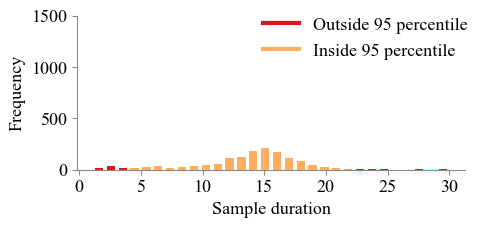

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

samples = arr
samples.sort()

fig, ax = plt.subplots(1, 1, figsize=(5,2))

# lengthdf = pd.read_pickle('db/full-chatbot-egemaps-median.pkl')

custom_lines = [Line2D([0], [0], color='#d7191c', lw=3, label='Outside 95 percentile'),
                Line2D([0], [0], color='#fdae61', lw=3, label='Inside 95 percentile')]

upper = np.percentile(samples, 97.5)
lower = np.percentile(samples, 2.5)


lower_idx = 0
upper_idx = 0
for i,x in enumerate(samples):
    if x > lower:
        lower_idx = i
        break
for i,x in enumerate(samples):
    if x > upper:
        upper_idx = i
        break
lower_bar = round(lower)
upper_bar = round(upper)
print("Lower",lower,lower_idx, lower_bar)
print("Upper",upper,upper_idx,upper_bar)



N, bins, patches = ax.hist(samples, bins=30, facecolor = '#fdae61', rwidth=0.7)
ax.set_ylim([0, 1500])
ax.set(title=None)
ax.set_ylabel(ylabel='Frequency', fontname="Times New Roman", fontsize=13)
ax.set_xlabel(xlabel='Sample duration', fontname="Times New Roman", fontsize=13)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(color='#888888')
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(13)
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(13)
for spine in ax.spines.values():
    spine.set_edgecolor('#888888')
for i in range(0,lower_bar):
    patches[i].set_facecolor('#d7191c')
for i in range(upper_bar,len(patches)):
    patches[i].set_facecolor('#d7191c')
ax.legend(handles=custom_lines, loc='upper right', bbox_to_anchor=(1.05,1.1), prop={'family': "Times New Roman", "size":13}, frameon=False)
# plt.savefig('img/length_distribution.svg')